# Machine learning - Data preparation project

### Martyna Baran,  Zuzanna Jarlaczyńska

## Exercise 1 and 2

#### Titanic Dataset 

DATABASE INFO

author: Will Cukierski

title: Titanic - Machine Learning from Disaster

publisher: Kaggle

year: 2012

url: https://kaggle.com/competitions/titanic

a) In this dataset we have 890 patterns - data of people who were in the Titanic.

b) In the dataset we have 12 atributes and the class column, from which 5 are cathegorical, 4 are numerical and we also have PssengerId and the class.

Our atributes are: PassengerId;   Survived - out class;   Pclass - ticket class, this feature can be use to predict the socio-economic status of passenger {1 = upper, 2= middle, 3 = lower};   Name;   Sex - male, female;   Age;   SibSp - number of siblings or sposues aboard;   Parch number of parents or children aboard;   Ticket - number of ticket;   Fare - passenger fare;  Cabin - number of cabin;   Embarked - Port of embarkation {S-Southampton, C- Cherbourg, Q - Queenstown}

c) Let's start working with our data. Firstly we decided to get the infromation about the numerical data using desribe() and about the not-numerical using describe but with the parameters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [2]:
filename = "train.csv"
col_names = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
data = pd.read_csv(filename,names=col_names)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,NaN,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C


In [65]:
data.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,892,892,892,892,892,715,892,892,892,892,205,890
unique,892,3,4,892,3,89,8,8,682,249,148,4
top,PassengerId,0,3,Name,male,24,0,0,1601,8.05,C23 C25 C27,S
freq,1,549,491,1,577,30,608,678,7,43,4,644


In [66]:
data.describe(include=['O'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,892,892,892,892,892,715,892,892,892,892,205,890
unique,892,3,4,892,3,89,8,8,682,249,148,4
top,PassengerId,0,3,Name,male,24,0,0,1601,8.05,C23 C25 C27,S
freq,1,549,491,1,577,30,608,678,7,43,4,644


In [80]:
numerical_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare' ]
numerical_data = data[data.columns(numerical_columns)]
numerical_data.head()

TypeError: 'Index' object is not callable

In [79]:
data.skew(numerical_columns)

TypeError: unhashable type: 'list'

d) Missing values - we can get them from the info() function.

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  892 non-null    object
 1   Survived     892 non-null    object
 2   Pclass       892 non-null    object
 3   Name         892 non-null    object
 4   Sex          892 non-null    object
 5   Age          715 non-null    object
 6   SibSp        892 non-null    object
 7   Parch        892 non-null    object
 8   Ticket       892 non-null    object
 9   Fare         892 non-null    object
 10  Cabin        205 non-null    object
 11  Embarked     890 non-null    object
dtypes: object(12)
memory usage: 83.8+ KB


e) Class distribution 

In [69]:
print(data.groupby('Survived').size())

Survived
0           549
1           342
Survived      1
dtype: int64


In [70]:
print(data.groupby('Sex').size())

Sex
Sex         1
female    314
male      577
dtype: int64


f) Corelatio between classes 

In [71]:
data.corr()

/var/folders/vy/zs5s6srd4vs2wd4y1r5wcbjc0000gn/T/ipykernel_5587/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


""


ConversionError: Failed to convert value(s) to axis units: array(['22', '35', nan, '54', '2', '20', '39', '14', '2', '31', '35', '8',
       nan, '19', nan, '40', '66', '28', '42', '21', '18', '40', '27',
       nan, nan, nan, nan, '18', '7', '21', '65', '28.5', '11', '22',
       '45', '4', nan, '19', '26', '32', '16', '21', '26', '25', nan, nan,
       '22', '28', '16', nan, '24', '29', '20', '46', '26', '59', nan,
       '71', '34', '28', nan, '21', '33', '37', '28', '38', '47', '14.5',
       '22', '20', '17', '21', '70.5', '29', '24', '2', '21', nan, '32.5',
       '54', nan, '45', '33', '20', '47', '25', '23', '37', '16', '24',
       nan, '19', '18', '19', '9', '36.5', '42', '51', '55.5', '40.5',
       nan, '51', '30', nan, nan, '44', '26', '17', '1', '45', nan, '28',
       '61', '4', '21', '56', '18', nan, '50', '30', '36', nan, nan, '9',
       nan, '40', '36', '19', nan, '42', '24', '28', nan, '34', '45.5',
       '2', '32', '24', '22', '30', nan, '42', '30', '27', '51', nan,
       '22', '20.5', '18', nan, '29', '59', '24', nan, '44', '19', '33',
       nan, '29', '22', '30', '44', '25', '54', nan, '29', '62', '30',
       '41', nan, '52', '40', nan, '36', '16', nan, '37', '45', nan, '7',
       '65', '28', '16', nan, '33', '22', '36', '24', '24', nan, '23.5',
       '2', '19', nan, '30', '26', '28', '43', '54', '22', '27', nan,
       '61', '45.5', '38', '16', nan, '29', '45', '28', '25', '36', '42',
       '23', nan, '15', '25', nan, '28', '38', '40', '29', '45', '35',
       nan, '30', '18', '19', '22', '3', '27', '20', '19', '32', nan,
       '18', '1', nan, '28', '22', '31', '46', '23', '26', '21', '28',
       '20', '34', '51', '21', nan, nan, nan, nan, nan, '30', '10', nan,
       '21', '29', '28', '18', nan, nan, '17', '50', '21', '64', '31',
       '20', '25', '36', nan, '30', nan, '65', nan, '34', '47', '48', nan,
       '38', nan, '56', nan, nan, '38', '22', nan, '34', '29', '22', '9',
       nan, '50', nan, '58', '30', nan, '21', '55', '71', '21', nan, nan,
       '25', '24', '17', '21', nan, '37', '18', '28', nan, '24', '47',
       nan, '32', '22', nan, nan, '40.5', nan, '39', '23', nan, '17',
       '30', '45', nan, '9', '11', '50', '64', '33', '27', nan, '62', nan,
       nan, '40', '28', nan, nan, '24', '19', '29', nan, '16', '19', nan,
       '54', '36', nan, '47', '22', nan, '35', '47', nan, '37', '36',
       '49', nan, nan, nan, '44', '36', '30', '39', nan, nan, '35', '34',
       '26', '26', '27', '21', '21', '61', '57', '26', nan, '51', nan,
       '9', '32', '31', '41', nan, '20', '2', '19', nan, nan, '21', '18',
       '24', nan, '32', '23', '58', '40', '47', '36', '32', '25', nan,
       '43', '31', '70', nan, '18', '24.5', '43', nan, '20', '14', '60',
       '25', '14', '19', '18', '25', '60', '52', '44', '49', '42', '18',
       '25', '26', '39', nan, '29', '52', '19', nan, '33', '17', '34',
       '50', '20', '25', '25', '11', nan, '23', '23', '28.5', '48', nan,
       nan, '36', '24', '70', '16', '19', '31', '33', '23', '28', '18',
       '34', nan, '41', '16', nan, '30.5', nan, '32', '24', '48', '57',
       nan, '18', nan, nan, '29', nan, '25', '25', '8', '46', nan, '16',
       nan, nan, '25', '39', '30', '30', '34', '31', '39', '18', '39',
       '26', '39', '35', '6', '30.5', nan, '23', '31', '43', '10', '38',
       '2', nan, nan, nan, '23', '18', '21', nan, '20', '16', '34.5',
       '17', '42', nan, '35', '28', '4', '74', '9', '44', nan, '41', '21',
       nan, '24', '31', nan, '26', '33', '47', '20', '19', nan, '33',
       '22', '28', '25', '39', '27', nan, '32'], dtype=object)

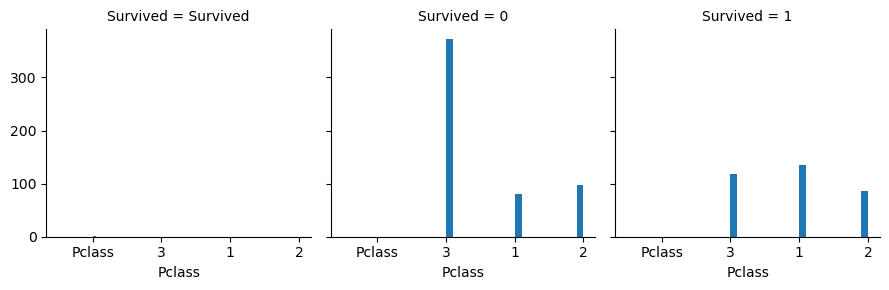

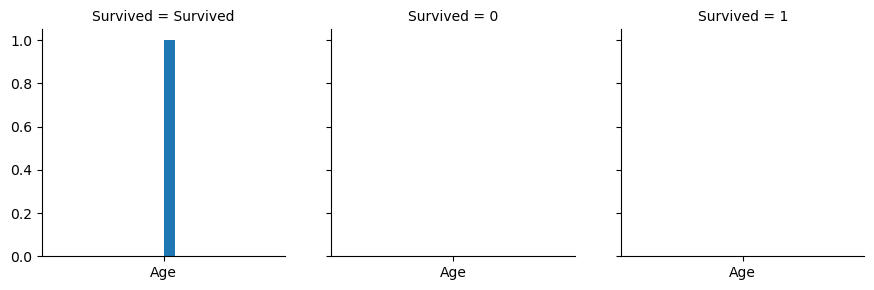

In [73]:
import seaborn as sns
numerical_cols= ['Pclass','Age','SibSp','Parch','Fare']
for elem in numerical_cols:
    g = sns.FacetGrid(data, col='Survived')
    g.map(plt.hist, elem, bins=20)

We will analize the columns that we believe can have the real impact on the predictions.

- PasengerId : this column doesn't gives any useful informations, only the fact that there are 890 rows in out dataset.

- Pclass: as we can see most of the people abord had 3rd class ticket. The same we can see from the skewness which is left-skewed. What is more, last graphs shows most of the people who didin't survive where from the lowest class and the difference is quite huge. We can assume that this factor might have big impact on surviving - probably people from the first used their material situation to escape from the drowing ship.

- Name: we can assume that it is not meaningful fator. Also there all of them ar unique.

- Sex: the information about it is full. We can see that there were many more me aboard. For now we can't really see how many of them survived, but we assume that it was meaningful facto and that more women survived.

- Age: the average age is 29, but as we can see there are some outscores like the fact that the oldest person was 80 (and they actually suvived!). The correlation between survivig and age is very small, so that meas there isn't any linear conection between those factors. However, if we look at the last graphs we can see that from people who didint survived most were at agem age 20 to 35. Also, it shows that many kids survived and people in the age of 35 to 40 (probably at least one of their parents). From the info column we see that there are also some rows missing here.

- SibSp: from the mean we can see that there weren't many spouses and sibligs abord. There isn't any see correlation between this factor and the survived.

- Parch: the mean here is also rather low - it is not suprising as we can see that there were many young people aboard (15-28 years old). This factor also does not show big correlation with suvival.

- Ticket: although not all of them are unique, we dont really believe that the number of ticket might have any impact on surviving, because we don't even know how to distinguish which class has which ticket.

- Fare: this is very interesting factor. From the graph and also the describion we see that most of the tickets were rather cheap. But if we look at the correlation table there is the biggest correlation between this factor and the surviving( alse the skewness is the highest positive from all). Take a look ate the last graphs and see that there is a huge difference between the amout of people who paid less for the ticket and died that from those who had the most expensive tickets.

- Cabin: unfortunately thereis a lot of missing values in here - we are not sure if we can use this data. 

- Embarked: Most of the people left from Southampton. This is a cathegorical data so for now we dont have many informations about the correlations. We can see that there are two missing points.


## Exercise 3

a) Firstly let's visualise data using univariate graphs

- Histograms

In [76]:
input_data = data[data.columns[2:]]
input_data.hist()

ValueError: hist method requires numerical or datetime columns, nothing to plot.

- density graphs

In [ ]:
input_data.plot(kind='density', layout=(2,3), subplots=True, sharex=False)

- box plots

In [ ]:
input_data.plot (kind='box', subplots=True, layout=(1,5),sharex=False,sharey=False)

Those graphs shows exactly the nuremical informations we get earlier - but they are easier to read. 

- Pclass: most people from the 3rd class, no outliers.

- Age: Significant majority of 15 to 35 year olds, there are some outliers, as we well remember, the titanic voyage was a great breakthrough and it is no wonder that so many people of all ages wanted to take this course.

- SibSp: Most of the people had 0 or 1 spouse or siblings aboard( while the median is around the 0, then the 3rd quantile is much closer to 1), but there are single outliers.

- Parch - signifact majority had 0 - we can see that from all of the graphs.

- Fare - the histogram shows a gradual decrease in the number of people as prices increase, in density graph the decline appears to be sharp and the box plots shows a lot of outliers.

b) Multivariate graphs

- scatter matrix

In [ ]:
correlations = data.corr()
f = plt.figure()
cax=plt.matshow(correlations, fignum=f.number, cmap="inferno")
plt.xticks(range(correlations.shape[1]), correlations.columns,
rotation=45)
plt.yticks(range(correlations.shape[1]), correlations.columns)
f.colorbar(cax, fraction=0.05, pad=0.05)
plt.show()

pd.plotting.scatter_matrix(input_data, alpha= 0.3, diagonal= 'kde')

## Exercise 4 and 5 

We decided to combine those exercises so we will be able to use different methods for different things. Every step will be described. 

Our idea is to firstly work with the 'embarked' column which is one of the categorical column. It unfortunately has 2 missing values so if we start with the binaisation we will get the column called 'Embarked_Nan'. Also, we have some columns with unique data like name or ticket, which will completly destroy our dataset if we try to binarise it before droping them.

We had to deal with missing values in three cases. Firstly in column 'Age' we used KNN Imputation. This algorithm has imputed the missing values by finding the samples in the training set “closest” to it and averages these nearby points. In case of column 'Embarked' we used the SimpleImputer and 'most_frequent' strategy. We simply filled missing categorical values with value that occurs the most often. Finally, we decided to drop the column 'Cabin'. We assumed that as it isn't not strongly correlated with class 'Survival' and has many missing values, it is not crucial for our data set.

5a) Univariate - 'Embarked column' - we start with using this method for the Embarked column because we believe that having consider the significant mjority of S patterns we can easily use SimpleInputer here.

In [3]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['Embarked'] = imputer.fit_transform(data[['Embarked']])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  892 non-null    object
 1   Survived     892 non-null    object
 2   Pclass       892 non-null    object
 3   Name         892 non-null    object
 4   Sex          892 non-null    object
 5   Age          715 non-null    object
 6   SibSp        892 non-null    object
 7   Parch        892 non-null    object
 8   Ticket       892 non-null    object
 9   Fare         892 non-null    object
 10  Cabin        205 non-null    object
 11  Embarked     892 non-null    object
dtypes: object(12)
memory usage: 83.8+ KB


In [ ]:
data.describe(include='O')

we used the most frequent method and as we can see the frequency of 'S' is 2 more.

Now we will delete the Cabin column.

In [4]:
data = data.drop(['Cabin'], axis=1)

The next step we are planning to do is the binarisation of the data but before that we want to get rid of some columns, that we believe are useless. Those are : Name, Ticket and also as PassengerId.

In [5]:
data= data.drop(['Ticket', 'Name', 'PassengerId'], axis=1)

Now we can start with the binarisation of the data - we'e gonna use 

In [ ]:
data.head()

In [ ]:
data.head()

In [6]:
# wez usun pozniej to binarised data przed oddaniem
input_data = data[data.columns[1:]]
categorical_columns = ['Sex','Pclass','Embarked']
transformer = ColumnTransformer([('one_hot_encoder',OneHotEncoder(), categorical_columns)], remainder='passthrough')

input_data_encoded = transformer.fit_transform(input_data)
binarised_data = pd.DataFrame(input_data_encoded, columns=['Female', 'Male', 'Pclass_1','Pclass_2', 'Pclass_3','Embarked_C','Embarked_Q','Embarked_S','Age','SibSp','Parch','Fare'])
input_data_encoded = pd.DataFrame(input_data_encoded)

print(input_data_encoded.head(5))
X = input_data_encoded
Y = data['Survived']

binarised_data.head()

ValueError: Shape of passed values is (892, 15), indices imply (892, 12)

In [ ]:
binarised_data = binarised_data.join(Y)
binarised_data.head()

5b) Now before scaling we're gonna move to fulfil the blank spaces in Age column - we will do it in multivariate way.

In [ ]:
imputer = KNNImputer()
imputer.fit(X)
new_data=imputer.transform(X)
binarised_and_full = pd.DataFrame(new_data, columns=['Female', 'Male', 'Pclass_1','Pclass_2', 'Pclass_3','Embarked_C','Embarked_Q','Embarked_S','Age','SibSp','Parch','Fare'])
binarised_and_full.head()

In [ ]:
binarised_and_full = binarised_and_full.join(Y)

So now let's sum up what we have:

- Binarised_and_full is a DataFrame that consist of all the data that now is only numerical and don't have any missing values - we also add here the survived column so right now it is our fully informative structure.

- Input_data_encoded and X are dataframes that only have the binarised data, but still have missing values

- Y: is out class column


So now let's get some information about our data like we got in point 3 before we scale them - we will also do if after scaling and compare results

In [77]:
new_data

NameError: name 'new_data' is not defined

In [ ]:
new_data_frame = pd.DataFrame(new_data)

In [ ]:
new_data_frame

In [ ]:
new_data_frame.skew()

In [ ]:
binarised_and_full.describe()

In [ ]:
binarised_and_full.corr()

In [ ]:
binarised_and_full.hist()

In [ ]:
binarised_and_full.plot(kind='density', layout=(4,4), subplots=True, sharex=False)

In [ ]:
correlations = binarised_and_full.corr()
f = plt.figure()
cax=plt.matshow(correlations, fignum=f.number, cmap="inferno")
plt.xticks(range(correlations.shape[1]), correlations.columns,
rotation=45)
plt.yticks(range(correlations.shape[1]), correlations.columns)
f.colorbar(cax, fraction=0.05, pad=0.05)
plt.show()

pd.plotting.scatter_matrix(input_data, alpha= 0.3, diagonal= 'kde')

In [ ]:
binarised_and_full.skew()

we see that we shoul apply scaling to male, female, pclass_3 and age. The rest should be normalised.

In [ ]:
data_for_scaling = binarised_and_full[['Female', 'Male', 'Pclass_3', 'Age']]
minmaxSc = MinMaxScaler(feature_range=(0, 1))
minmaxSc.fit(data_for_scaling)
rescXS = minmaxSc.transform(data_for_scaling)
print("scaled data")
print(pd.DataFrame(rescXS))

data_for_normalisation= binarised_and_full[['Pclass_1', 'Pclass_2', 'SibSp','Parch','Fare','Embarked_C','Embarked_Q','Embarked_S' ]]
stdScaler = StandardScaler().fit(data_for_normalisation)
rescXN = stdScaler.transform(data_for_normalisation)
print("noralisation")
print(pd.DataFrame(rescXN))

In [ ]:
scaled = pd.DataFrame(rescXS, columns=['Female', 'Male', 'Pclass_3', 'Age'])
normalised = pd.DataFrame(rescXN, columns=['Pclass_1', 'Pclass_2', 'SibSp','Parch','Fare','Embarked_C','Embarked_Q','Embarked_S' ])
scaled.head()
normalised.head()

In [ ]:
SN_data = scaled.join(normalised)
SN_data.head()

In [ ]:
SN_data = SN_data.join(Y)

In [ ]:
SN_data.corr()
SN_data.describe()

In [ ]:
SN_data.corr()

## Exercise 6

a)
- filter methods 

Feature selection not relying on machine learning algorithms. Instead, features are chosen basing on the correlation with outcome variable. In our case we used SelectKBest function which gives us top 5 features


- wrapper methods - 
In our work we used RFE method. It ranks the features based on importance and eliminates the least important ones until the desired number of features is reached.

In [ ]:
# filter metod 
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
input_data = SN_data[SN_data.columns[:-1]]

filterKB = SelectKBest(score_func=f_classif, k=6)
filter_model = filterKB.fit(input_data, SN_data['Survived'])
print(filter_model.scores_)
selected = filter_model.transform(input_data)
print(pd.DataFrame(selected).head())

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(solver="liblinear")
rfe = RFE(logReg)
rfe_model = rfe.fit(input_data, data['Survived'])
print("Features selected: ", rfe_model.n_features_)
print("Features selected: ", rfe_model.support_)
print("Ranking: ", rfe_model.ranking_)

b)SelectKBest features that were selected: 'male', 'female', 'class1', 'class3', 'embarkedC', 'Fare'.

RFE We selected features: 'male', 'female', 'class1', 'class2', 'age', 'SibSp'

Both methods considered features 'male', 'female' and 'class1' as crucial. It corresponds to our earlier considerations regarding impact of each feature on 'Survival' feature. We can see different approaches of both methods because the first one filtered column 'embarkedC' and 'class3' while the other one chose 'age' and 'SibSp'.

## Exrecise 7

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [ ]:
X_ = SN_data[SN_data.columns[:-1]]
Y_= SN_data['Survived']

target_names = ['survived','not-survived']
pca = PCA(n_components=2)
X_r = pca.fit(X_).transform(X_)
print ('Explained variance : ' , pca.explained_variance_ratio_)
plt.figure ()
colors = ['indigo' , 'lightseagreen']
lw = 2
for color , i , target_name in zip( colors , [0, 1], target_names):
    plt.scatter (X_r[Y_ == i, 0], X_r[Y_ == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
plt.legend( loc='best', scatterpoints =1)
plt.title ( 'PCA of Titanic dataset' )
plt.show()

After applying PCA for our data set we reduced the number of dimensions from 10 to 2. Therefore we can visualize our data on a plot. After dimensionality reduction, there isn’t a particular meaning assigned to each of 2 principal components. Unfortunately in our case two groups, survived and non-survived, are not easily separable. That means that our data can't be divided in only two dimensions.

In [ ]:
!pip show scikit-learn

In [ ]:
import sklearn
print(sklearn.__version__)
